<!--NAVIGATION-->
< [Tamanho da Amostra, Variância e Viés](004.Tamanho-da-Amostra-Variância-e-Viés.ipynb) | [Conteúdo](Index.ipynb) | [A ser definido] >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/005.Teste-de-Hipotese-o-inicio.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Teste de Hipótese, o início

Já vimos [aqui](002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb) que um dos problemas clássicos da estatística consiste em **estimar o valor de um parâmetro desconhecido**, por exemplo, estimar a média $\mu$ de uma <font color=orange>população</font> (*<font color=orange>population</font>*) a partir:
- (1a) de uma <font color=gray>amostra aleatória</font> (<font color=gray>random sample</font>) $x = \{ x_1, x_2, \ldots, x_n \}$ desta <font color=orange>população</font> (*<font color=orange>population</font>*) e 
- (1b) de um **estimador** (***estimator***) para a média, ou seja, um <font color=magenta>algoritmo</font> como a média aritmética $\bar{x} = \sum_{i=1}^n \frac{x_i}{n}$;
- (2) além de se basear no Teorema Central do Limite (*Central Limit Theorem - CLT*) e nas suas condições para fornecermos uma <font color=magenta>inferência</font> a respeito da precisão do <font color=magenta>algoritmo</font> (média aritmética) através do cálculo da aproximação $\hat{se}$ para o erro padrão (*standard error*) $SE$ desta estimativa via $SE \approx \hat{se} = \frac{s}{\sqrt{n}}$.

Um outro problema muito comum na estatística clássica é **verificar se uma dada hipótese é plausível em detrimento de outra com base nos dados observados**. Considere o seguinte exemplo:

>*Researchers investigating characteristics of gifted children collected data from schools in a large city on a random sample of $36$ children who were identified as gifted children soon after they reached the age of four. In this study, along with variables on the children, the researchers also collected data on the mother's IQ of the $36$ randomly sampled gifted children. Our goal is to evaluate if these data provide convincing evidence that the average IQ of mothers of gifted children is different than the average IQ for the population at large, which is $100$.*
<small>(Fonte: "A. Graybill and H.K. Iyer. <em>Regression Analysis: Concepts and Applications</em>. Duxbury Press, 1994, pp. 511-516")</small>
<small>(Fonte: https://www.openintro.org/stat/textbook.php?stat_book=os)</small>

In [1]:
import pandas as pd

gifted_df = pd.read_csv("data/gifted.txt", delimiter='\t')
gifted_df.head()

,score,fatheriq,motheriq,speak,count,read,edutv,cartoons
0,159,115,117,18,26,1.9,3.00,2.00
1,164,117,113,20,37,2.5,1.75,3.25
2,154,115,118,20,32,2.2,2.75,2.50
3,157,113,131,12,24,1.7,2.75,2.25
4,156,110,109,17,34,2.2,2.25,2.50


In [2]:
# some statistics about the IQ of mothers of gifted children from this random sample
gifted_df.motheriq.describe()

count     36.000000
mean     118.166667
std        6.504943
min      101.000000
25%      113.750000
50%      118.000000
75%      122.250000
max      131.000000
Name: motheriq, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001187F0A9358>]],
      dtype=object)

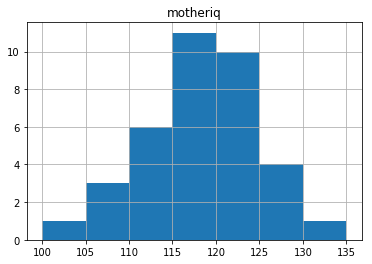

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# histogram of IQ of mothers of gifted children from this random sample
gifted_df.hist(column='motheriq', bins=(100,105,110,115,120,125,130,135))

A <font color=orange>população</font> (*<font color=orange>population</font>*) em foco aqui consiste nas <font color=orange>mães de crianças superdotadas</font> e o parâmetro de interesse é o <font color=orange>QI médio das mães de crianças superdotadas</font>. Além disto, observou-se um <font color=gray>QI médio</font> $\bar{x}_{gifted} = 118,2$ de uma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) de $n = 36$ <font color=gray>mães de crianças superdotadas</font>.

In [4]:
n = len(gifted_df.index)
mean_observed_IQ_gifted = gifted_df.motheriq.mean()

print("Random sample size = {0}".format(n))
print("Observed average IQ of mothers of gifted children = {0:.1f}".format(mean_observed_IQ_gifted))

Random sample size = 36
Observed average IQ of mothers of gifted children = 118.2


Queremos verificar se estes dados observados suportam a **hipótese** ($H_A$) de que o <font color=orange>QI médio das mães de crianças superdotadas</font> ($\mu_{gifted}$, que é desconhecido) é maior do que o <font color=orange>QI médio para a população geral</font> (que é igual a $\mu_{pop\_geral} = 100$) versus a outra **hipótese** ($H_0$) de que o <font color=orange>QI médio das mães de crianças superdotadas</font> não é tão diferente assim do <font color=orange>QI médio para a população geral</font>. Ou seja:

- $H_0$: o <font color=orange>QI médio das mães de crianças superdotadas</font> **não é diferente** do <font color=orange>QI médio para a população geral</font>, ou seja, $\mu_{gifted} = \mu_{pop\_geral}$.
- $H_A$: o <font color=orange>QI médio das mães de crianças superdotadas</font> **é maior do que** o <font color=orange>QI médio para a população geral</font>, ou seja, $\mu_{gifted} \gt \mu_{pop\_geral}$.

![HT-gifted-01](figures/HT_gifted_01.jpg)

Em outras palavras, será que este <font color=gray>QI médio</font> $\bar{x}_{gifted}=118,2$ <font color=gray>observado</font> **é raro o suficiente** dentro dos valores de QIs médios da população geral para que possamos considerar o <font color=orange>QI médio das mães de crianças superdotadas</font> **como diferente** do <font color=orange>QI médio para a população geral</font> (que é igual a $\mu_{pop\_geral}=100$)?

<blockquote>
Até aqui estamos o tempo todo nos referindo ao <strong>QI médio</strong>, ou seja, estamos nos referindo a uma <font color=blue>estatística da amostra</font> (<em><font color=blue>sample statistic</font></em>) que no nosso caso é a <font color=blue>média da amostra</font> (<em><font color=blue>sample mean</font></em>). E, como já vimos <a href="002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb" target="_blank">aqui</a>, a distribuição destas <font color=blue>estatísticas das amostras</font> (<em><font color=blue>sample statistics</font></em>) é denominada <font color=blue>distribuição amostral</font> (<em><font color=blue>sampling distribution</font></em>).
</blockquote>

Então, novamente em outras palavras, se tivermos a <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs para a população geral</font>:
- $H_A$: A probabilidade de uma média de QI igual ou mais extrema do que $118,2$ é pequena o suficiente para considerarmos raro o evento de termos observado, na prática, um <font color=gray>QI médio</font> $\bar{x}_{gifted}=118,2$?
- $H_0$: Ou será que esta probabilidade não é tão pequena, indicando que um QI médio de $\bar{x}_{gifted}=118,2$ não é tão diferente do QI médio da população geral $\mu_{pop\_geral}=100$?

![HT-gifted-02](figures/HT_gifted_02_v2.jpg)

<blockquote>
E por falar em <font color=blue>distribuição amostral</font> (<em><font color=blue>sampling distribution</font></em>), podemos invocar aqui o Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>) que nos diz que quando a <font color=blue>estatística da amostra</font> (<em><font color=blue>sample statistic</font></em>) é a <strong>média</strong>, se:

<ul>
<li><strong>(1a)</strong> o <font color=gray>tamanho da amostra</font> (<em><font color=gray>sample size</font></em>) é suficientemente grande ($n > 30$ ou maior se os dados são consideravelmente enviesados), ou</li>
<li><strong>(1b)</strong> sabe-se de antemão que a <font color=orange>população</font> (<em><font color=orange>population</font></em>) tem uma distribuição normal, e</li>
<li><strong>(2)</strong> as observações da <font color=gray>amostra</font> (<em><font color=gray>sample</font></em>) são independentes,</li>
</ul>
    
<p>então, a <font color=blue>distribuição das médias</font> das <font color=gray>amostras</font> (<em><font color=gray>samples</font></em>) será aproximadamente normal (<em>nearly normal</em>), centrada na <font color=orange>média da população</font> (<em><font color=orange>population mean</font></em>) $\mu$ e com um <font color=blue>erro padrão</font> (<em><font color=blue>standard error</font></em>) de $SE=\frac{\sigma}{\sqrt{n}}$:</p>

<p>$$
\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)
$$</p>
</blockquote>

![HT-gifted-03](figures/HT_gifted_03_v2.jpg)

Bom, não temos a <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs para a população geral</font>, o que temos são:
- uma <font color=gray>amostra aleatória</font> (<font color=gray>random sample</font>) de $n = 36$ QIs de <font color=gray>*mães de crianças superdotadas*</font>;
- e o <font color=orange>QI médio para a população geral</font> $\mu_{pop\_geral}=100$.

<mark>Mas pelo Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>), se as condições <strong>(1)</strong> e <strong>(2)</strong> forem verdadeiras para o nosso caso, então, podemos assumir que a <font color=blue>distribuição amostral</font> (<em><font color=blue>sampling distribution</font></em>) das <font color=blue>médias de QIs para a população geral</font> é da forma:<mark>

$$
\text{Médias QIs população geral} \sim N\left(mean=100, SE_{pop\_geral}=\frac{\sigma_{pop\_geral}}{\sqrt{n}}\right)
$$

Ainda precisamos calcular o valor do <font color=blue>erro padrão</font> (<em><font color=blue>standard error</font></em>) $SE_{pop\_geral}=\frac{\sigma_{pop\_geral}}{\sqrt{n}}$ para termos a forma completa da <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs para a população geral</font>. Ou seja, precisamos:
- do <font color=orange>desvio padrão</font> (*<font color=orange>standard deviation</font>*) $\sigma_{pop\_geral}$ da <font color=orange>distribuição de QIs para a população geral</font>;
- e do tamanho $n$ de alguma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) de QIs da população geral.

Bom, não temos acesso à <font color=orange>distribuição de QIs para a população geral</font>, logo, não temos o <font color=orange>desvio padrão</font> (*<font color=orange>standard deviation</font>*) $\sigma_{pop\_geral}$. <mark>Entretanto, podemos ter uma aproximação para $\sigma_{pop\_geral}$ através do <font color=gray>desvio padrão</font> (<em><font color=gray>standard deviation</font></em>) $s_{pop\_geral}$ de alguma <font color=gray>amostra aleatória</font> (<em><font color=gray>random sample</font></em>) de QIs da população geral.</mark>

Mas o que temos não é uma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) de QIs da população geral, mas sim uma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) de $n = 36$ QIs de <font color=gray>mães de crianças superdotadas</font>. <mark>Então, se, por um instante, <strong>assumirmos</strong> que a <strong>hipótese</strong> $H_0$ <strong>é verdadeira</strong>, estamos assumindo que o <font color=orange>QI médio das mães de crianças superdotadas</font> <strong>não é diferente</strong> do <font color=orange>QI médio para a população geral</font>, o que implica que podemos considerar a <font color=gray>amostra aleatória</font> (<em><font color=gray>random sample</font></em>) de $n = 36$ QIs de <strong>mães de crianças superdotadas</strong> como se fosse uma <font color=gray>amostra aleatória</font> (<em><font color=gray>random sample</font></em>) de QIs <strong>da população geral</strong>.</mark>

Então,

$$
\text{se } H_0 = True \enspace \Rightarrow \enspace \text{podemos assumir que } s_{pop\_geral} = s_{gifted} = 6,5 \enspace \Rightarrow \enspace SE_{pop\_geral} = \frac{\sigma_{pop\_geral}}{\sqrt{n}} \approx \frac{s_{pop\_geral}}{\sqrt{n}} = \frac{6,5}{\sqrt{36}} = 1,084
$$

![HT-gifted-04](figures/HT_gifted_04_v2.jpg)

In [5]:
import numpy as np

std_observed_IQs_gifted = gifted_df.motheriq.std()

# estimated SE for IQs for population at large when H0 is true
estimated_SE = std_observed_IQs_gifted / np.sqrt(n)

print("Standard deviation of IQ of mothers of gifted children = {0:.1f}".format(std_observed_IQs_gifted))
print("Estimated standard error of IQs for the pop. at large when H0 is true = {0:.3f}".format(estimated_SE))

Standard deviation of IQ of mothers of gifted children = 6.5
Estimated standard error of IQs for the pop. at large when H0 is true = 1.084


Logo, o nosso **modelo** que descreve as médias de QIs para a população geral quando assumimos que a **hipótese** $H_0$ é verdadeira é o:

$$
\text{se } H_0 = True \enspace \Rightarrow \enspace \text{Médias QIs população geral} \sim N\left(mean=100, SE_{pop\_geral}=1,084\right)
$$

In [6]:
from scipy import stats as st

mean_pop_IQ = 100

sampling_dist_mean_IQs_when_H0_is_true = st.norm(loc=mean_pop_IQ, scale=estimated_SE)

In [7]:
# import some dependencies to visualization with altair
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session

def draw_density_plot(distribution, distribution_name, x_axis_limits=None):
    # Create the points to draw the probability density function
    x_i = distribution.ppf(0.00000000000001)
    x_f = distribution.ppf(0.99999999999999)
    x = np.linspace(x_i, x_f, 100)
    f_x = distribution.pdf(x)
    
    # draw the density function f(x)
    data = pd.DataFrame({'x': x, 'f(x)': f_x})
    
    altX = 'x:Q'
    if x_axis_limits is not None:
        altX = alt.X('x:Q', scale=alt.Scale(domain=x_axis_limits))
    
    density = alt.Chart(data).mark_line().encode(
        x=altX,
        y='f(x):Q'
    ).properties(title='{0}'.format(distribution_name))
    
    return density

def draw_density_and_point_plot(distribution, distribution_name, obs_point, draw_area=False, type_area='left_area', 
                                x_axis_limits=None):
    
    density = draw_density_plot(distribution, distribution_name, x_axis_limits)
    
    obs_value_mark_rule = density.mark_rule(color='red').encode(
        x='obs_value:Q',
        size=alt.value(1)
    ).transform_calculate(
        obs_value=str(obs_point)
    )
    
    plot = density + obs_value_mark_rule
    
    if draw_area:
        if type_area == 'left_area':
            predicate = alt.FieldLTEPredicate(field='x', lte=obs_point)
        elif type_area == 'range_area':
            obs_value_mark_rule2 = density.mark_rule(color='red').encode(
                x='obs_value:Q',
                size=alt.value(1)
            ).transform_calculate(
                obs_value=str(-obs_point)
            )
            
            plot = density + obs_value_mark_rule + obs_value_mark_rule2

            predicate = alt.FieldRangePredicate(
                field='x', 
                range=[(obs_point if obs_point < 0 else -obs_point), (obs_point if obs_point > 0 else -obs_point)]
            )
        else:
            predicate = alt.FieldGTEPredicate(field='x', gte=obs_point)
            
        obs_value_mark_area = density.mark_area().encode(
            x='x:Q',
            y='f(x):Q'
        ).transform_filter(
            predicate
        )
        plot = plot + obs_value_mark_area
    
    return plot

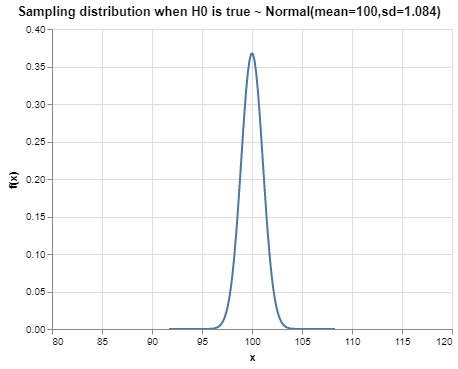

In [8]:
distribution_name = "Sampling distribution when H0 is true ~ Normal(mean={0},sd={1:.3f})".format(mean_pop_IQ, estimated_SE)

diff = mean_observed_IQ_gifted - mean_pop_IQ
x_axis_limits = ((mean_pop_IQ-diff), (mean_pop_IQ+diff))

draw_density_plot(sampling_dist_mean_IQs_when_H0_is_true, distribution_name, x_axis_limits)

Logo, como já temos um **modelo** que representa a <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs para a população geral</font> <mark>quando assumimos que a <strong>hipótese</strong> $H_0$ é verdadeira</mark>, então, podemos calcular, utilizando este **modelo** (curva azul na figura abaixo), qual a probabilidade de observarmos uma média de QI igual ou mais extrema do que $118,2$ (marcação vermelha na figura abaixo).

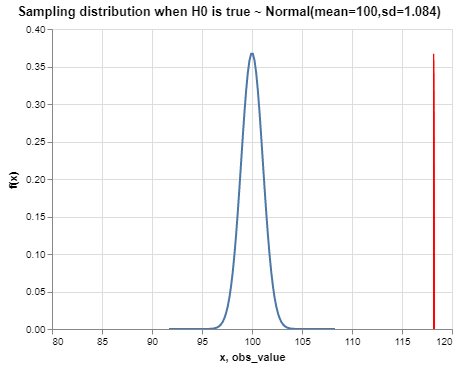

In [9]:
draw_density_and_point_plot(
    sampling_dist_mean_IQs_when_H0_is_true, distribution_name, mean_observed_IQ_gifted, 
    False, '', x_axis_limits
)

In [10]:
# use the CDF (cumulative distribution function) to calculate the probability 
# that we will take a value grater than or equal to the observed mean
probability = 1.0 - sampling_dist_mean_IQs_when_H0_is_true.cdf(x=mean_observed_IQ_gifted)

print("Observed average IQ of mothers of gifted children = {0:.1f}".format(mean_observed_IQ_gifted))
print("Probability(IQ >= 118.2 | H0 is true) ~ {0} ({1}%)".format(probability, probability*100))

Observed average IQ of mothers of gifted children = 118.2
Probability(IQ >= 118.2 | H0 is true) ~ 0.0 (0.0%)


Então, <mark>se a <strong>hipótese</strong> $H_0$ for verdadeira e as condições <strong>(1)</strong> e <strong>(2)</strong> do Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>) forem válidas para o nosso caso</mark>, a probabilidade de observarmos uma média de QI igual ou maior do que $118,2$ é de praticamente $0\%$. No entanto, os dados que temos mostram que observamos um <font color=gray>QI médio</font> $\bar{x}_{gifted}=118,2$. Logo:
- ou as condições **(1)** e **(2)** do Teorema Central do Limite (*Central Limit Theorem - CLT*) não são válidas para o nosso caso;
- ou temos uma evidência forte o suficiente para acreditar que a **hipótese** $H_0$ não seja verdadeira, mostrando que a **hipótese** válida é a $H_A$.

Vamos verificar se as condições **(1)** e **(2)** do Teorema Central do Limite (*Central Limit Theorem - CLT*) são válidas para o nosso caso.

A condição **(1)** exige que:
- **(1a)** o <font color=gray>tamanho da amostra</font> (*<font color=gray>sample size</font>*) seja suficientemente grande ($n > 30$ ou maior se os dados são consideravelmente enviesados), ou
- **(1b)** que a <font color=orange>população</font> (*<font color=orange>population</font>*) tenha uma distribuição normal.

Como temos uma <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) de $n = 36$ QIs de <font color=gray>mães de crianças superdotadas</font> e o histograma desta <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) não é consideravelmente enviesado, então, a condição **(1a)** está satisfeita, o que já satisfaz a condição **(1)**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011801A03438>]],
      dtype=object)

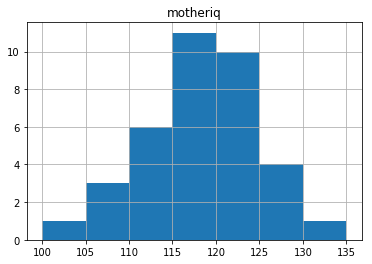

In [11]:
# histogram of IQ of mothers of gifted children from this random sample
gifted_df.hist(column='motheriq', bins=(100,105,110,115,120,125,130,135))

A condição **(2)** exige que:
- **(2)** as observações da <font color=gray>amostra</font> (<em><font color=gray>sample</font></em>) sejam independentes.

<mark>A independência de observações em uma amostra é viabilizada pelo uso de <strong>amostragem aleatória</strong> (no caso de estudos observacionais) ou <strong>atribuição aleatória</strong> (no caso de experimentos)</mark>. O nosso caso trata de um estudo observacional e, conforme informado no enunciado, os pesquisadores obtiveram uma **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) de $n = 36$ QIs de <font color=gray>mães de crianças superdotadas</font>. Logo, a condição **(2)** também está safisfeita.

Portanto, concluímos que temos uma evidência forte o suficiente para acreditar que a **hipótese** $H_0$ não é verdadeira, mostrando que a **hipótese** válida é a $H_A$, ou seja, a de que o <font color=orange>QI médio das mães de crianças superdotadas</font> **é maior do que** o <font color=orange>QI médio para a população geral</font>.

![HT-gifted-05](figures/HT_gifted_05_v2.jpg)

## Hipóteses Nula e Alternativa

No exemplo anterior, as notações $H_0$ e $H_A$ para as **hipóteses** não foram utilizadas à toa. Denota-se por $H_0$ a **hipótese nula** (***null hypothesis***) e por $H_A$ a **hipótese alternativa** (***alternative hypothesis***).

A **hipótese nula** (***null hypothesis***) $H_0$ geralmente representa uma **posição cética** ou uma **perspectiva de nenhuma diferença**, por exemplo, o <font color=orange>QI médio das mães de crianças superdotadas</font> **não é diferente** do <font color=orange>QI médio para a população geral</font>.

A **hipótese alternativa** (***alternative hypothesis***) $H_A$ geralmente representa uma **nova perspectiva**, como a **possibilidade de que houve uma mudança**, por exemplo, o <font color=orange>QI médio das mães de crianças superdotadas</font> **é maior do que** o <font color=orange>QI médio para a população geral</font>.

***
<mark>Além disto, as <strong>hipóteses</strong> sempre devem ser construídas em relação aos parâmetros da <font color=orange>população</font> (<em><font color=orange>population</font></em>) -- por exemplo, a <font color=orange>média da população</font> (<em><font color=orange>population mean</font></em>) $\mu$ -- e não em relação às <font color=blue>estatísticas das amostras</font> (<em><font color=blue>sample statistics</font></em>) -- por exemplo, a <font color=gray>média da amostra</font> (<em><font color=gray>sample mean</font></em>) $\bar{x}$.</mark>

<mark>Observe que o parâmetro da <font color=orange>população</font> (<em><font color=orange>population</font></em>) é <strong>desconhecido</strong>, enquanto que a <font color=blue>estatística da amostra</font> (<em><font color=blue>sample statistic</font></em>) é <strong>medida</strong> utilizando os dados observados e, portanto, não há razão para criar <strong>hipóteses</strong> sobre isso.</mark>
***

## Utilizando o escore-z (*z-score*)

No exemplo anterior, a partir do momento em que assumimos que a <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs para a população geral</font> é uma **normal**:

$$
\text{se } H_0 = True \enspace \Rightarrow \enspace \text{Médias QIs população geral} \sim N\left(mean=100, SE_{pop\_geral}=1,084\right)
$$

então, ao invés de verificar:
- **(a)** Qual a probabilidade de observarmos uma média de QI igual ou mais extrema do que $118,2$ dentro do modelo $N\left(mean=100, SE_{pop\_geral}=1,084\right)$?

podemos transformar esta pergunta em:
- **(b)** Qual a probabilidade de observarmos uma distância **em unidades de QI** igual ou mais extrema do que $118,2 - 100 = 18,2$ dentro do modelo $N\left(mean=100, SE_{pop\_geral}=1,084\right)$?

Como a distribuição é uma **normal** e estamos medindo a distância de um valor ($118,2$) para a média de uma **normal** ($\mu=100$), então, é possível **generalizar** este conceito para trabalharmos com o **escore-z** (***z-score***), que como já vimos [aqui](002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb), é também uma medida de distância, no caso, o número de **desvios padrão** (***standard deviations***) acima (positivo) ou abaixo (negativo) de uma média de uma distribuição **normal**.

A **generalização** aqui ocorre a partir do momento que substituímos uma distância ($18,2$) dada em **unidades de QI** por uma distância dada em **desvios padrão** (***standard deviations***), em outras palavras, uma distância dada em **escores-z** (***z-scores***).

In [12]:
distance_in_IQ_units = mean_observed_IQ_gifted - mean_pop_IQ

std_of_our_model_when_H0_is_true = estimated_SE

distance_in_standard_deviations = distance_in_IQ_units / std_of_our_model_when_H0_is_true

observed_z_score = distance_in_standard_deviations

print("Distance from the mean in IQ units = {0:.1f}".format(distance_in_IQ_units))
print("Standard deviation of our model when H0 is true (i.e. the estimated SE) = {0:.3f}".format(
    std_of_our_model_when_H0_is_true))
print("Observed z-score (i.e. distance in standard deviations) = {0:.2f}".format(observed_z_score))

Distance from the mean in IQ units = 18.2
Standard deviation of our model when H0 is true (i.e. the estimated SE) = 1.084
Observed z-score (i.e. distance in standard deviations) = 16.76


Assim, a pergunta passa a ser: Qual a probabilidade de observarmos um **escore-z** (***z-score***) igual ou mais extremo do que $16,76$?

Uma vez que já sabemos que os valores de **escore-z** (***z-score***) são distribuídos de acordo com a **distribuição normal padrão** (***standard normal distribution***) que também é conhecida como **distribuição z** (***z distribution***), então:

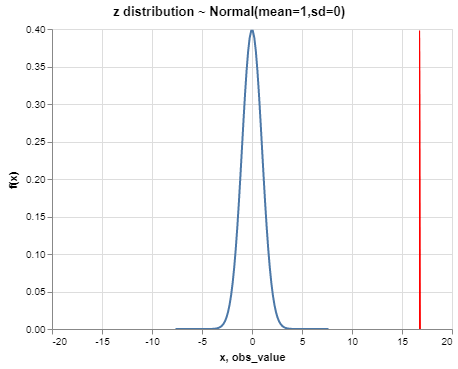

In [13]:
z_distribution = st.norm(loc=0, scale=1)
distribution_name = "z distribution ~ Normal(mean=1,sd=0)"

x_axis_limits = (-observed_z_score, +observed_z_score)

draw_density_and_point_plot(z_distribution, distribution_name, observed_z_score, False, '', x_axis_limits)

In [14]:
# use the CDF (cumulative distribution function) to calculate the probability 
# that we will take a value grater than or equal to the observed z-score
probability = 1.0 - z_distribution.cdf(x=observed_z_score)

print("Observed z-score = {0:.2f}".format(observed_z_score))
print("Probability(z-score >= 16.76 | H0 is true) ~ {0} ({1}%)".format(probability, probability*100))

Observed z-score = 16.76
Probability(z-score >= 16.76 | H0 is true) ~ 0.0 (0.0%)


Logo, utilizando o **escore-z** (***z-score***), chegaríamos na mesma conclusão de antes, ou seja:

><mark>Se a <strong>hipótese nula</strong> (<strong><em>null hypothesis</em></strong>) $H_0$ for verdadeira e as condições <strong>(1)</strong> e <strong>(2)</strong> do Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>) forem válidas para o nosso caso</mark>, a probabilidade de observarmos um <strong>escore-z</strong> (<strong><em>z-score</em></strong>) igual ou maior do que $16,76$ é de praticamente $0\%$. No entanto, os dados que temos mostram que observamos um <strong>escore-z</strong> (<strong><em>z-score</em></strong>) de $16,76 = \frac{\bar{x}_{gifted}-\mu_{pop\_geral}}{\hat{se}_{pop\_geral}}$.

E como já sabemos que as condições **(1)** e **(2)** do Teorema Central do Limite (*Central Limit Theorem - CLT*) são válidas para o nosso caso, então:

>Concluímos que temos uma evidência forte o suficiente para acreditar que a <strong>hipótese nula</strong> (<strong><em>null hypothesis</em></strong>) $H_0$ não é verdadeira, mostrando que a <strong>hipótese alternativa</strong> (<strong><em>alternative hypothesis</em></strong>) $H_A$ é válida, ou seja, a de que o <font color=orange>QI médio das mães de crianças superdotadas</font> <strong>é maior do que</strong> o <font color=orange>QI médio para a população geral</font>.

## O p-valor (*p-value*)

Nas duas abordagens anteriores (sem o uso e com o uso do ***z-score***) tivemos que calcular uma **probabilidade** que, no caso deste exemplo das mães de crianças superdotadas, nos ajudou a rejeitar a **hipótese nula** (***null hypothesis***) $H_0$ em detrimento da **hipótese alternativa** (***alternative hypothesis***) $H_A$, ou seja, vimos que:
- **(sem o uso do *z-score*):** <mark>se a <strong>hipótese nula</strong> (<strong><em>null hypothesis</em></strong>) $H_0$ for verdadeira e as condições <strong>(1)</strong> e <strong>(2)</strong> do Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>) forem válidas para o nosso caso</mark>, a **probabilidade** de observarmos uma média de QI igual ou maior do que $118,2$ é de praticamente $0\%$.
- **(com o uso do *z-score*):** <mark>se a <strong>hipótese nula</strong> (<strong><em>null hypothesis</em></strong>) $H_0$ for verdadeira e as condições <strong>(1)</strong> e <strong>(2)</strong> do Teorema Central do Limite (<em>Central Limit Theorem - CLT</em>) forem válidas para o nosso caso</mark>, a **probabilidade** de observarmos um <strong>escore-z</strong> (<strong><em>z-score</em></strong>) igual ou maior do que $16,76$ é de praticamente $0\%$.

Em outras palavras, trata-se de uma **probabilidade condicional** (***conditional probability***) denominada de **p-valor** (***p-value***) onde assumimos que a **hipótese nula** (***null hypothesis***) $H_0$ é verdadeira, ou seja:
- **(sem o uso do *z-score*):** $\text{p-value} = \Pr\left( \bar{x} \geq 118,2 \;\middle\vert\; H_0 = True \right) \approx 0$.
- **(com o uso do *z-score*):** $\text{p-value} = \Pr\left( \text{z-score} \geq 16,76 \;\middle\vert\; H_0 = True \right) \approx 0$.

In [15]:
# use the CDF (cumulative distribution function) to calculate the probability 
# that we will take a value grater than or equal to the observed mean
p_value = 1.0 - sampling_dist_mean_IQs_when_H0_is_true.cdf(x=mean_observed_IQ_gifted)

print("Observerd average IQ of mothers of gifted children = {0:.1f}".format(mean_observed_IQ_gifted))
print("p-value = Probability(IQ >= 118.2 | H0 is true) ~ {0} ({1}%)".format(p_value, p_value*100))

print("-------------------------")

# use the CDF (cumulative distribution function) to calculate the probability 
# that we will take a value grater than or equal to the observed z-score
p_value = 1.0 - z_distribution.cdf(x=observed_z_score)

print("Observed z-score = {0:.2f}".format(observed_z_score))
print("p-value = Probability(z-score >= 16.76 | H0 is true) ~ {0} ({1}%)".format(p_value, p_value*100))

Observerd average IQ of mothers of gifted children = 118.2
p-value = Probability(IQ >= 118.2 | H0 is true) ~ 0.0 (0.0%)
-------------------------
Observed z-score = 16.76
p-value = Probability(z-score >= 16.76 | H0 is true) ~ 0.0 (0.0%)


Esta **probabilidade condicional** (***conditional probability***) quantifica a força da evidência contra a **hipótese nula** (***null hypothesis***) $H_0$ e a favor da **hipótese alternativa** (***alternative hypothesis***) $H_A$. Quanto <font color=magenta>menor</font> o valor do **p-valor** (***p-value***) <font color=magenta>mais forte é a evidência contra a</font> **hipótese nula** (***null hypothesis***) $H_0$, uma vez que o **p-valor** (***p-value***) é uma probabilidade <font color=magenta>condicionada à</font> **<font color=magenta>validade</font>** <font color=magenta>da</font> **hipótese nula** (***null hypothesis***) $H_0$.

Mas o quão pequeno deve ser o valor do **p-valor** (***p-value***) para que possamos rejeitar a **hipótese nula** (***null hypothesis***) $H_0$ e ficar com a **hipótese alternativa** (***alternative hypothesis***) $H_A$? Este é um assunto para um outro tópico :).

Pela definição da wikipedia:

>*In statistical hypothesis testing, the <strong>p-value</strong> or <strong>probability value</strong> or <strong>asymptotic significance</strong> is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary (such as the sample mean difference between two compared groups) would be greater than or equal to the actual observed results.*
<small>(Fonte: https://en.wikipedia.org/wiki/P-value)</small>

ou seja, para o nosso exemplo:
- **(sem o uso do *z-score*):** 
  - o modelo estatístico (*statistical model*): $\bar{X} \sim N\left(mean=100, std=1,084\right)$
  - a estatística utilizada (*statistical summary*): $\bar{x}_{observed} = 118,2$ 
  - o p-valor (*p-value*): $\Pr\left( \bar{x} \geq 118,2 \;\middle\vert\; H_0 = True \right) \approx 0$
- **(com o uso do *z-score*):**
  - o modelo estatístico (*statistical model*): $\text{z-score} \sim N\left(mean=0, std=1\right)$
  - a estatística utilizada (*statistical summary*): $\text{z-score}_{observed} = 16,76$ 
  - o p-valor (*p-value*): $\Pr\left( \text{z-score} \geq 16,76 \;\middle\vert\; H_0 = True \right) \approx 0$

Então, de maneira mais genérica, podemos definir o **p-valor** (***p-value***) como:

$$
\text{p-value} = \Pr\left( \text{observed or more extreme sample statistic} \;\middle\vert\; H_0 = True \right).
$$

![HT-gifted-06](figures/HT_gifted_06.jpg)

## O teste Z (*Z test*)

Todo o procedimento que fizemos anteriormente e <mark>tudo o que assumimos ao longo do procedimento</mark> para chegar à conclusão de que o <font color=orange>QI médio das mães de crianças superdotadas</font> **é maior do que** o <font color=orange>QI médio para a população geral</font>, na prática, foi um **teste Z** (***Z test***).

Pela wikipedia:

>*A <strong>Z-test</strong> is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.*
<small>(Fonte: https://en.wikipedia.org/wiki/Z-test)</small>

Utilizando Python (e talvez qualquer outra linguagem de programação com bibliotecas/pacotes estatísticos), <font color=magenta>com apenas uma linha de código</font> (como a abaixo `ztest(.)`) podemos executar um **teste Z** (***Z test***) e chegar na mesma conclusão de antes:

In [16]:
from statsmodels.stats.weightstats import ztest

# run a one-sided Z test
test_statistic, p_value = ztest(x1=np.array(gifted_df.motheriq), x2=None, value=mean_pop_IQ, alternative='larger')

print("test statistic (in this case, the z-score) = {:.2f}".format(test_statistic))
print("p-value = {:.3f}".format(p_value))

test statistic (in this case, the z-score) = 16.76
p-value = 0.000


Ao executar o **teste Z** (***Z test***) obtivemos como resultado:
- uma **estatística de teste** (***test statistic***) -- que no caso é o **escore-z** (***z-score***) -- de $16,76$, ou seja, idêntico ao **escore-z** (***z-score***) que calculamos anteriormente;
- um **p-valor** (***p-value***) praticamente igual a $0$, ou seja, idêntico ao **p-valor** (***p-value***) que calculamos anteriormente.

e tudo isto <font color=magenta>com apenas uma linha de código</font> ... e é "aqui que mora o perigo", ou seja, é tão fácil e rápido utilizar esta "<font color=magenta>apenas uma linha de código</font>" que muitas pessoas esquecem (ou não sabem) as premissas por trás do uso desta "<font color=magenta>apenas uma linha de código</font>" e, como consequência, podem acabar tirando conclusões equivocadas. Talvez este seja o motivo do nome ***Danger Zone!*** no famoso diagrama de Venn abaixo.

![ds-venn-diagram](figures/Data_Science_VD.png)
<small>(Fonte: Image of <a href="https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png?format=750w" target="_blank">Data Science Venn Diagram</a>, by Drew Conway, licensed under a Creative Commons Attribution-<a href="http://creativecommons.org/licenses/by-nc/3.0/legalcode" target="_blank">Attribution-NonCommercial</a>.)</small>

Então, vamos listar aqui tudo o que tivemos que assumir para executar o **teste de hipótese** (***hypothesis testing***) -- na prática o **teste Z** (***Z test***) -- do exemplo do <font color=orange>QI médio das mães de crianças superdotadas</font>:
- Que as condições **(1)** e **(2)** impostas pelo Teorema Central do Limite (*Central Limit Theorem - CLT*) são válidas para o nosso caso, ou seja:
  - **(1a)** o <font color=gray>tamanho da amostra</font> (*<font color=gray>sample size</font>*) é suficientemente grande ($n > 30$ ou maior se os dados são consideravelmente enviesados), ou
  - **(1b)** sabe-se de antemão que a <font color=orange>população</font> (*<font color=orange>population</font>*) tem uma distribuição normal, e
  - **(2)** as observações da <font color=gray>amostra</font> (*<font color=gray>sample</font>*) são independentes.
- Que a <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das <font color=blue>médias de QIs</font> é aproximadamente normal (*nearly normal*).
- Que o <font color=gray>desvio padrão</font> (*<font color=gray>standard deviation</font>*) $s$ da <font color=gray>amostra aleatória</font> (*<font color=gray>random sample</font>*) -- que utilizamos para calcular a estimativa $\hat{se}$ para o <font color=blue>erro padrão</font> (*<font color=blue>standard error</font>*) $SE=\frac{\sigma}{\sqrt{n}}$ da <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das médias de QIs -- é uma boa aproximação para o <font color=orange>desvio padrão</font> (*<font color=orange>standard deviation</font>*) $\sigma$ da <font color=orange>população</font> (*<font color=orange>population</font>*);
- Que a estimativa $\hat{se}$ também é uma boa aproximação para o <font color=blue>erro padrão</font> (*<font color=blue>standard error</font>*) $SE=\frac{\sigma}{\sqrt{n}}$ da <font color=blue>distribuição amostral</font> (*<font color=blue>sampling distribution</font>*) das médias de QIs.

Ou seja, por trás do uso desta "<font color=magenta>apenas uma linha de código</font>" temos todas as premissas anteriores que tivemos que assumir para poder utilizar o **teste Z** (***Z test***).

## Resumo

**R1.** Em **teste de hipótese** (***hypothesis testing***) avaliamos duas afirmações concorrentes:
- A hipótese nula (*null hypothesis*) $H_0$ que geralmente representa uma posição cética ou uma perspectiva de nenhuma diferença;
- A hipótese alternativa (*alternative hypothesis*) $H_A$ que geralmente representa uma nova perspectiva, como a possibilidade de que houve uma mudança.

**R2.** As **hipóteses** sempre devem ser construídas em relação aos parâmetros da <font color=orange>população</font> (*<font color=orange>population</font>*) -- por exemplo, a <font color=orange>média da população</font> (*<font color=orange>population mean</font>*) $\mu$ -- e não em relação às <font color=blue>estatísticas das amostras</font> (*<font color=blue>sample statistics</font>*) -- por exemplo, a <font color=gray>média da amostra</font> (*<font color=gray>sample mean</font>*) $\bar{x}$.

**R3.** A **independência** de observações em uma amostra é viabilizada pelo uso de amostragem aleatória (no caso de estudos observacionais) ou atribuição aleatória (no caso de experimentos).

**R4.** O **p-valor** (***p-value***) é uma probabilidade condicional (*conditional probability*) que quantifica a força da evidência contra a hipótese nula (*null hypothesis*) $H_0$. Quanto <font color=magenta>menor</font> o valor do p-valor (*p-value*) <font color=magenta>mais forte é a evidência contra a</font> hipótese nula (*null hypothesis*) $H_0$, uma vez que o p-valor (*p-value*) é uma probabilidade <font color=magenta>condicionada à</font> **<font color=magenta>validade</font>** <font color=magenta>da</font> hipótese nula (*null hypothesis*) $H_0$.
- $\text{p-value} = \Pr\left( \text{observed or more extreme sample statistic} \;\middle\vert\; H_0 = True \right).$

**R5.** Teste de hipótese (*hypothesis testing*) para uma **única média** via o **teste Z** (***Z test***):
1. Estabeleça as hipóteses:
  - $H_0: \mu = \text{null value}$
  - $H_A: \mu < \text{ou} > \text{ou} \neq \text{null value}$
1. Calcule a <font color=blue>estimativa pontual</font> (*<font color=blue>point estimate</font>*): $\bar{x}$
1. Verifique se as condições do Teorema Central do Limite (*Central Limit Theorem - CLT*) são válidas:
  - **(1a)** o <font color=gray>tamanho da amostra</font> (*<font color=gray>sample size</font>*) é suficientemente grande ($n > 30$ ou maior se os dados são consideravelmente enviesados), ou
  - **(1b)** sabe-se de antemão que a <font color=orange>população</font> (*<font color=orange>population</font>*) tem uma distribuição normal, e
  - **(2)** as observações da <font color=gray>amostra</font> (*<font color=gray>sample</font>*) são independentes.
1. Calcule o <font color=blue>erro padrão</font> (*<font color=blue>standard error</font>*):
  - $SE = \frac{\sigma}{\sqrt{n}}$, se tiver acesso ao <font color=orange>desvio padrão</font> (*<font color=orange>standard deviation</font>*) $\sigma$ da <font color=orange>população</font> (*<font color=orange>population</font>*);
  - $\hat{se} = \frac{s}{\sqrt{n}}$, caso contrário.
1. Calcule a estatística de teste (*test statistic*):
  - $\text{z-score}_{observed} = \frac{\bar{x} - \mu}{SE}$, ou
  - $\text{z-score}_{observed} = \frac{\bar{x} - \mu}{\bar{se}}$.
1. Calcule o p-valor (*p-value*):
  - $\text{p-value} = \Pr\left( \text{z-score} \geq \text{z-score}_{observed} \;\middle\vert\; H_0 = True \right)$
  - onde $\text{z-score} \sim N\left(mean=0, std=1\right)$
1. Com base no valor calculado para o p-valor (*p-value*), determine se a hipótese $H_0$ deve ou não ser rejeitada:
  - Lembre-se, quanto <font color=magenta>menor</font> o valor do p-valor (*p-value*) <font color=magenta>mais forte é a evidência contra a</font> hipótese nula (*null hypothesis*) $H_0$.

*Referências*:
- https://www.openintro.org/stat/textbook.php?stat_book=os
- https://en.wikipedia.org/wiki/Conditional_probability
- https://en.wikipedia.org/wiki/P-value
- https://en.wikipedia.org/wiki/Z-test
- https://en.wikipedia.org/wiki/Test_statistic

<!--NAVIGATION-->
< [Tamanho da Amostra, Variância e Viés](004.Tamanho-da-Amostra-Variância-e-Viés.ipynb) | [Conteúdo](Index.ipynb) | [A ser definido] >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/005.Teste-de-Hipotese-o-inicio.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>